# Energy Monte Carlo

This figure shows the result for a monte carlo simulation of many village trials and the resulting daily energy use.

In [1]:
%matplotlib inline
import numpy as np
import xray
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

I create a table of values using pandas and give the index and columns labels.

In [2]:
import pandas as pd
proportions = pd.Series({'TV':0.80, 'radio': 0.40, 'lighting':0.90, 'fridge':0.30, 'fan':0.18, 'rice_cooker':0.25})
daily_energy = pd.Series({'TV':0.20, 'radio': 0.03, 'lighting':0.25, 'fridge':1, 'fan':0.5, 'rice_cooker':0.5})
appliance_data = pd.DataFrame({'proportions':proportions, 'daily_energy':daily_energy})
appliance_data.index.name = 'appliance'
appliance_data.columns.name = 'values'
appliance_data

values,daily_energy,proportions
appliance,,
TV,0.20,0.80
fan,0.50,0.18
fridge,1.00,0.30
lighting,0.25,0.90
radio,0.03,0.40
rice_cooker,0.50,0.25


In [3]:
appliance_data = xray.Dataset.from_dataframe(appliance_data)
#appliance_data

In [4]:
# create an array with the proportions of each appliance for each trial
num_trials = 10000
appliance = appliance_data['appliance'].values
data = np.ones((num_trials, len(appliance)))
trials = np.arange(num_trials)
sim = xray.DataArray(data, coords=[trials, appliance], dims=['trials', 'appliance'])
# broadcast multiply by the table above
sim = sim * appliance_data['proportions']
#sim

In [5]:
# perform a binomial sample over each element of array to get number of appliances
# I want a cleaner way to do this
# can I extend a ufunc so that I get a xray object back?
num_households = 100
data = binom.rvs(num_households, sim)
appliance_sim = xray.DataArray(data, coords=[trials, appliance], dims=['trials', 'appliance'])
#appliance_sim

In [6]:
# multiply by daily energy
energy_sim = appliance_sim * appliance_data['daily_energy']
#energy_sim

In [7]:
# sum over appliances
daily_simulations = energy_sim.sum('appliance') / num_households

In [8]:
print('The daily energy distribution has a mean of {} and stdev of {}'.format(daily_simulations.mean().data,
                                                                              daily_simulations.std().data))

The daily energy distribution has a mean of 0.91302091 and stdev of 0.05539239823091161


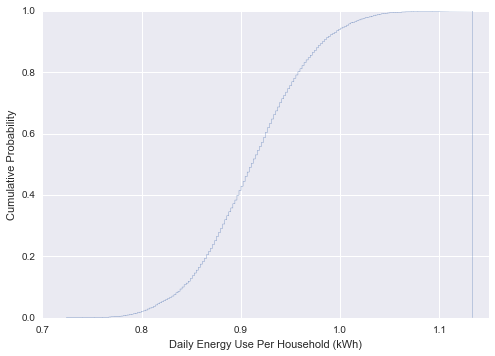

In [12]:
plt.hist(daily_simulations, normed=True, cumulative=True, histtype='step', bins=200)
plt.xlabel('Daily Energy Use Per Household (kWh)')
plt.ylabel('Cumulative Probability')
plt.savefig('daily-energy-simulation.png')
plt.show()


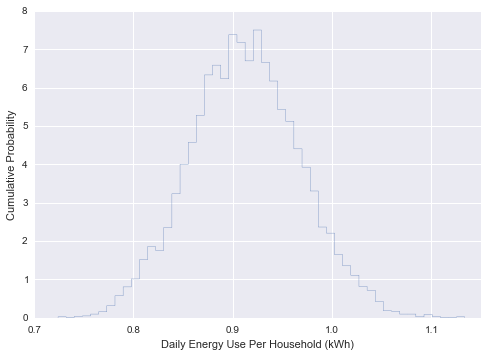

In [10]:
plt.hist(daily_simulations, normed=True, histtype='step', bins=50)
plt.xlabel('Daily Energy Use Per Household (kWh)')
plt.ylabel('Cumulative Probability')
plt.show()
#plt.savefig('daily-energy-simulation.pdf')